In [39]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# read in mood data
mood_data = pd.read_csv("data/mood_data.csv")
mood_data

,title,artist,primary,secondary
0,who says,selena gomez,2,3
1,don't stop,5 seconds of summer,3,2
2,do you hear what i hear,carrie underwood,4,2
3,"alliance force, assemble",takanashi yasuharu,1,6
4,ni pa bu pa shi qu wo,liu zeng tong,2,4
...,...,...,...,...
195,nine four two zero,mai xiao er,2,4
196,zui mei hun li,bai xiao bai,2,4
197,jiu shi xi huan ni,li meng yin,2,6
198,xiao xing xing,wang su long,2,4


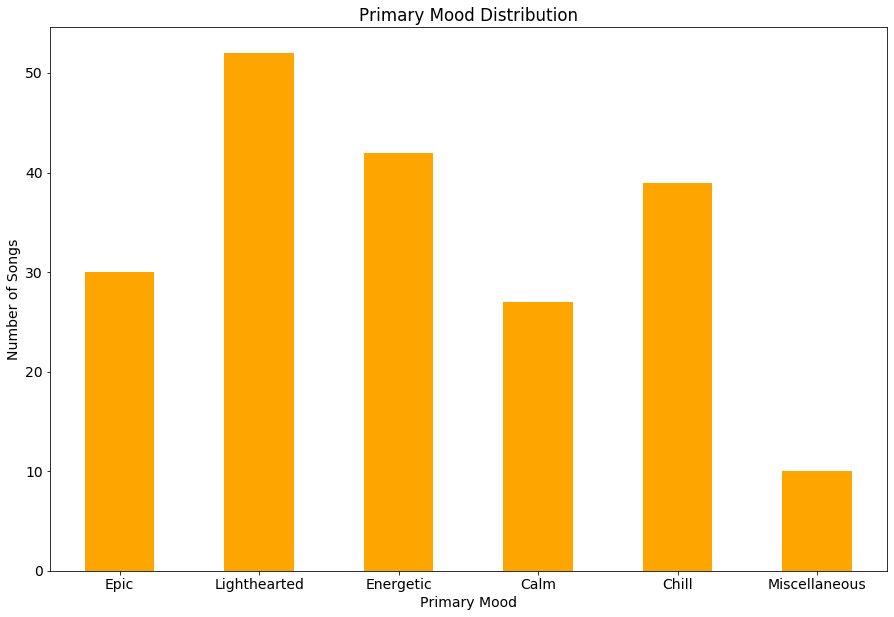

In [3]:
# pie chart for primary mood distribution
primary_groups = mood_data.groupby('primary')
plt.rc('font', size=14)
ax = primary_groups.size().plot.bar(y = 'primary', figsize=(15, 10), color = "orange", rot = 0)
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Primary Mood')
ax.set_title('Primary Mood Distribution')
ax.set_xticklabels(('Epic', 'Lighthearted', 'Energetic', 'Calm', 'Chill', 'Miscellaneous'))
plt.savefig("primary_dist.pdf")

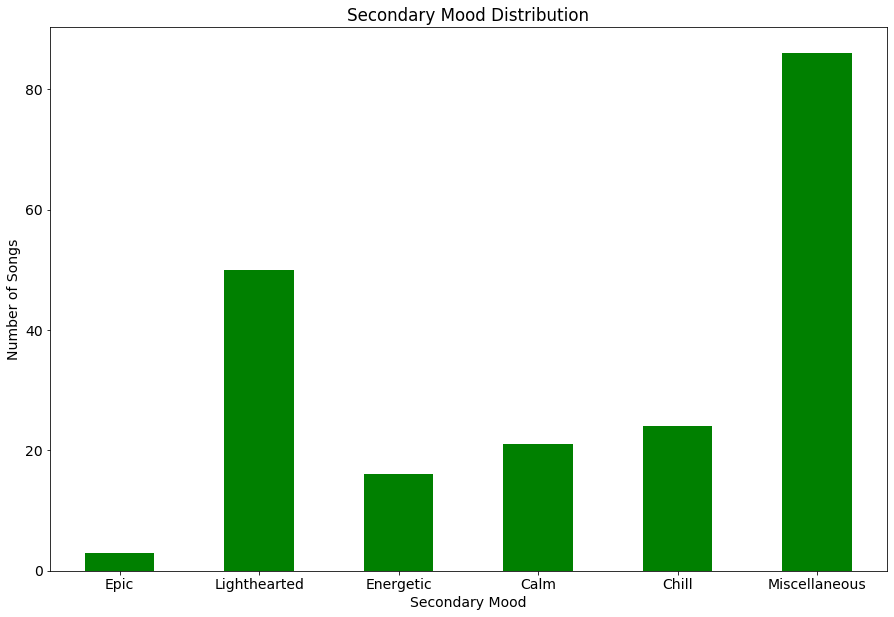

In [4]:
# pie chart for secondary mood distribution
secondary_groups = mood_data.groupby('secondary')
plt.rc('font', size=14)
ax = secondary_groups.size().plot.bar(y = 'secondary', figsize=(15, 10), color = "green", rot = 0)
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Secondary Mood')
ax.set_title('Secondary Mood Distribution')
ax.set_xticklabels(('Epic', 'Lighthearted', 'Energetic', 'Calm', 'Chill', 'Miscellaneous'))
plt.savefig("secondary_dist.pdf")

In [5]:
# list top 10 artists
artist_groups = mood_data.groupby('artist')
plt.rc('font', size=14)
top10 = artist_groups.size().sort_values(ascending = False).head(10)
top10

artist
takanashi yasuharu     18
one direction          13
super junior           12
two steps from hell    10
sereno                  7
taylor swift            5
yiruma                  4
yamagami takeshi        4
vk                      4
selena gomez            3
dtype: int64

In [81]:
features = pd.read_csv("data/features.csv")
features_corr = features.drop(columns = ['title', 'artist', 'primary', 'secondary'])
features_corr

,tempo,chroma_number,zero_crossing_rate,energy_entropy,spectral_centroid
0,117.453835,-0.010635,0.082014,3.164051,0.186062
1,129.199219,-0.005782,0.078039,3.213386,0.179459
2,92.285156,-0.016321,0.044617,3.217903,0.122203
3,103.359375,-0.007745,0.058125,3.142738,0.145660
4,117.453835,-0.010324,0.068620,3.211794,0.147982
...,...,...,...,...,...
195,99.384014,0.015339,0.056268,3.166332,0.156298
196,123.046875,-0.002242,0.056377,3.192966,0.140693
197,151.999081,-0.020014,0.019520,3.202357,0.075014
198,112.347147,0.022650,0.051512,3.168251,0.134493


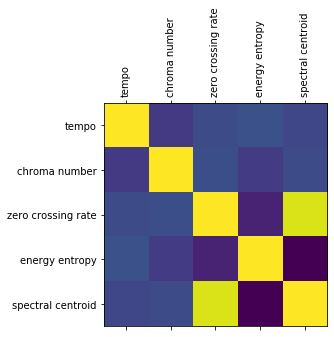

In [80]:
corr = features_corr.corr()
plt.matshow(corr)
labels = ['tempo', 'chroma number', 'zero crossing rate', 'energy entropy', 'spectral centroid']
plt.xticks(range(len(corr.columns)), labels, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), labels)
plt.savefig("data/correlation_matrix.pdf", bbox_inches='tight')
plt.show()

In [82]:
features

,title,artist,tempo,chroma_number,zero_crossing_rate,energy_entropy,spectral_centroid,primary,secondary
0,a new adventure,takanashi yasuharu,117.453835,-0.010635,0.082014,3.164051,0.186062,1,6
1,a oh,super junior,129.199219,-0.005782,0.078039,3.213386,0.179459,3,2
2,a thousand years,christina perri,92.285156,-0.016321,0.044617,3.217903,0.122203,6,5
3,adore u,seventeen,103.359375,-0.007745,0.058125,3.142738,0.145660,3,2
4,after rain,aimer,117.453835,-0.010324,0.068620,3.211794,0.147982,2,5
...,...,...,...,...,...,...,...,...,...
195,you he bu ke,xu song,99.384014,0.015339,0.056268,3.166332,0.156298,2,4
196,youth,troye sivan,123.046875,-0.002242,0.056377,3.192966,0.140693,5,6
197,zhe shi ai,"henry, donghae",151.999081,-0.020014,0.019520,3.202357,0.075014,4,6
198,zui mei hun li,bai xiao bai,112.347147,0.022650,0.051512,3.168251,0.134493,2,4
